# Постановка задачи


# Подготовка к анализу

## Подключение библиотек

In [1]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
#!pip install datetime
!pip install seaborn
!pip install plotly-express

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import datetime as dt
import seaborn as sns
import plotly.express as px

## Создание вспомогательных функций

Создадим функции, которые упростят процесс вывода всей необходимой информации о датасете.

In [2]:
# Функция для обзора датасета
def overview_df(df):
    print(" HEAD OF DATAFRAME ".center(100,'-'), '\n', df.head())
    print(" INFO OF DATAFRAME ".center(100,'-'))
    df.info()
    print(" SHAPE ".center(100,'-'), '\n', 'Rows: {}'.format(df.shape[0]), '\n', 'Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(100,'-'), '\n', df.dtypes)
    print(" NUMBER OF UNIQUES ".center(100,'-'), '\n', df.nunique())
    print(" MISSING VALUES ".center(100,'-'), '\n', missing_values(df))
    print(" DUPLICATED VALUES ".center(100,'-'), '\n', cheking_duplicates(df))
    print(" DESCRIPTIVE STATISTICS ".center(100,'-'), '\n', df.describe().T)

# Функция для поиска пропущенных значений
def missing_values(df):
    mn = df.isnull().sum().sort_values(ascending = False)
    mp = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([mn, mp], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    if mn.sum() > 0:
        return missing_values[missing_values['Missing_Number'] > 0]
    else:
        return 'There are no missing values.'

# Функция для проверки и подсчета количества дубликатов
def cheking_duplicates(df):
    duplicate_values = df.duplicated(keep = 'first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace = True)
        return 'The number of duplicated values is ' + str(duplicate_values) + '. Duplicates were dropped. New shape is ' + str(df.shape)
    else:
        return 'There are no duplicate values.'

# Первичный обзор датасета

С помощью написанной функции overview_df(df) выведем всю информацию о датасете.

In [3]:
df0 = pd.read_csv(r'C:\Users\Александра\Desktop\customer.csv')
df = df0.copy()

overview_df(df)

---------------------------------------- HEAD OF DATAFRAME ----------------------------------------- 
            InvoiceDate InvoiceNo StockCode  \
0  2010-12-01 08:26:00    536365    85123A   
1  2010-12-01 08:26:00    536365     71053   
2  2010-12-01 08:26:00    536365    84406B   
3  2010-12-01 08:26:00    536365    84029G   
4  2010-12-01 08:26:00    536365    84029E   

                           Description  Quantity  UnitPrice  CustomerID  Age  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55     17850.0   77   
1                  WHITE METAL LANTERN         6       3.39     17850.0   77   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75     17850.0   77   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39     17850.0   77   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39     17850.0   77   

   Gender        Income         Country  
0  female  26300.794657  United Kingdom  
1  female  26300.794657  United Kingdom  
2  female  26

# Предварительная обработка данных

## Очистка данных

### Ошибки в данных

### Пропущенные значения 

### Пропуски во временных рядах 

## Преобразование данных

### Преобразование количественных данных

### Работа с выбросами

# Вторичный обзор датасета после базовой чистки данных

In [4]:
# Вывод обзора датасета с помощью той же написанной функции
overview_df(df)

---------------------------------------- HEAD OF DATAFRAME ----------------------------------------- 
            InvoiceDate InvoiceNo StockCode  \
0  2010-12-01 08:26:00    536365    85123A   
1  2010-12-01 08:26:00    536365     71053   
2  2010-12-01 08:26:00    536365    84406B   
3  2010-12-01 08:26:00    536365    84029G   
4  2010-12-01 08:26:00    536365    84029E   

                           Description  Quantity  UnitPrice  CustomerID  Age  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55     17850.0   77   
1                  WHITE METAL LANTERN         6       3.39     17850.0   77   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75     17850.0   77   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39     17850.0   77   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39     17850.0   77   

   Gender        Income         Country  
0  female  26300.794657  United Kingdom  
1  female  26300.794657  United Kingdom  
2  female  26

# Исследовательский анализ данных (Exploratory Data Analysis - EDA)

Дубликаты уже были посчитаны и удалены во время составления первичного обзора датасета. 
Далее перейдем к 1-му этапу EDA -- описанию данных, содержащихся в каждом из столбцов, и разберемся, какие из них и почему необходимо почистить.
Почередно проверим, все ли данные из столбцов подходят для анализа, и сделаем выводы о полученной информации.

## 1 этап -- описание данных

### Категориальные данные


#### Столбец 3 'Description'

In [5]:
# Проверка количества уникальных описаний товаров (Description) среди всех записей о продажах
df.Description.nunique()

4223

In [6]:
# Топ-10 проданных "описаний" товаров (Description)
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE HEART CHALKBOARD        1272
Name: count, dtype: int64

Обратим внимание, что бывают записи, в которых описания товаров (Description) содержат некоторую информацию, не относящуюся к продажам. 

In [7]:
# Проверка данных, где записи описаний (Description) состоят из '?' или начинаются с '?'
df[df['Description'].str.startswith('?') == True]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
7313,2010-12-03 16:50:00,537032,21275,?,-30,0.0,NaN,25,female,32130.475292,United Kingdom
21518,2010-12-09 14:48:00,538090,20956,?,-723,0.0,NaN,25,female,32130.475292,United Kingdom
38261,2010-12-20 10:36:00,539494,21479,?,752,0.0,NaN,25,female,32130.475292,United Kingdom
43662,2011-01-04 16:53:00,540100,22837,?,-106,0.0,NaN,25,female,32130.475292,United Kingdom
50806,2011-01-10 10:04:00,540558,21258,?,-29,0.0,NaN,25,female,32130.475292,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
497819,2011-11-24 12:45:00,578476,72807B,????missing,-124,0.0,NaN,25,female,32130.475292,United Kingdom
497820,2011-11-24 12:45:00,578477,72807A,???missing,-224,0.0,NaN,25,female,32130.475292,United Kingdom
497821,2011-11-24 12:45:00,578478,72807C,???missing,-428,0.0,NaN,25,female,32130.475292,United Kingdom
524370,2011-12-05 09:29:00,580547,21201,???,-390,0.0,NaN,25,female,32130.475292,United Kingdom


In [8]:
# Заметим, что при этом CustomerId = NaN и цена за единицу товара UnitPrice = 0
# Удаление всех полученных записей
df = df[df['Description'].str.startswith('?') != True]

In [9]:
# Проверяем данных, где записи описаний (Description) начинаются с '*' 
df[df['Description'].str.startswith('*') == True]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
20749,2010-12-09 14:09:00,538071,21120,*Boombox Ipod Classic,1,16.98,NaN,25,female,32130.475292,United Kingdom
35675,2010-12-17 14:54:00,539437,20954,*USB Office Mirror Ball,1,8.47,NaN,25,female,32130.475292,United Kingdom
37095,2010-12-17 17:08:00,539453,20954,*USB Office Mirror Ball,1,8.47,NaN,25,female,32130.475292,United Kingdom


In [10]:
# Заметим, что при этом CustomerId = NaN
# Изменение записей на соответствующие описания (Description) без символа '*' и перевод в верхний регистр, как и во всех остальных записях
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [11]:
# В описаниях товаров (Description) есть записи строчными (в нижнем регистре) буквами - это "шумы" в датасете, которые можно удалить
df[df['Description'].str.islower() == True]['Description'].value_counts()

Description
check                                  159
damages                                 45
damaged                                 43
found                                   25
sold as set on dotcom                   20
                                      ... 
adjust                                   1
wrong code                               1
wrong code?                              1
did  a credit  and did not tick ret      1
lost                                     1
Name: count, Length: 117, dtype: int64

In [12]:
# Удаление всех найденных неподходящих записей-"шумов"
df = df[df['Description'].str.islower() != True]

In [13]:
# В описаниях товаров (Description) есть записи, 
# которые начинаются с заглавной буквы и не соответствуют типу большинства записей - это "шумы" в датасете, которые можно удалить
df[df['Description'].str.istitle() == True]['Description'].value_counts()

Description
Manual                   567
Next Day Carriage         80
Discount                  77
Bank Charges              37
Damaged                   14
Found                      8
Amazon                     7
High Resolution Image      3
Adjustment                 2
Dotcom                     1
Display                    1
Missing                    1
Show Samples               1
Crushed                    1
Dagamed                    1
Amazon Adjustment          1
Breakages                  1
Damages                    1
John Lewis                 1
Name: count, dtype: int64

In [14]:
# Удаление всех найденных неподходящих записей-"шумов"
df = df[df['Description'].str.istitle() != True]

In [15]:
# Преобразование записей описаний (Description) к единому виду, удалив лишние пробелы с начала и конца строки
df['Description'] = df['Description'].str.strip()

In [16]:
# Подведем итоги и выведем информацию после чистки данных
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE HEART CHALKBOARD        1272
Name: count, dtype: int64

#### Столбец 8 'Gender'

In [17]:
# Проверка количества уникальных совпадений по полу клиентов (Gender) среди всех записей
df.Gender.value_counts(normalize = True)

Gender
female    0.737222
male      0.262778
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

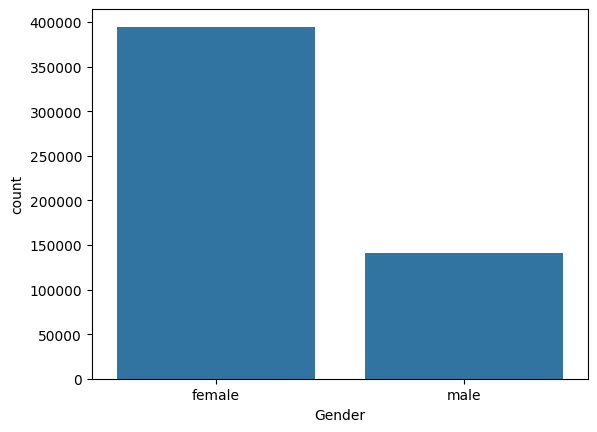

In [18]:
# Визуализация количества записей в категории пола клиентов (Gender)
sns.countplot(x = 'Gender', data = df)

#### Столбец 10 'Country'

In [19]:
# Проверка количества уникальных совпадений по стране (Country) среди всех записей
df.Country.value_counts(normalize = True)

Country
United Kingdom          0.913609
Germany                 0.017678
France                  0.015937
EIRE                    0.015265
Spain                   0.004717
Netherlands             0.004426
Belgium                 0.003865
Switzerland             0.003725
Portugal                0.002795
Australia               0.002350
Norway                  0.002018
Italy                   0.001496
Channel Islands         0.001410
Finland                 0.001296
Cyprus                  0.001138
Sweden                  0.000859
Unspecified             0.000826
Austria                 0.000749
Denmark                 0.000727
Japan                   0.000663
Poland                  0.000637
Israel                  0.000549
USA                     0.000544
Hong Kong               0.000519
Singapore               0.000402
Iceland                 0.000340
Canada                  0.000282
Greece                  0.000273
Malta                   0.000237
United Arab Emirates    0.000127
Eu

In [20]:
# Заметим, около 90% записей о стране (Country) относятся к Великобратании (United Kingdom)
# Разделим все записи о странах (Country) на две категории: "United Kingdom" и "Others", которая будет объединять все остальные страны
df['Country'] = df['Country'].apply(lambda x: 'United Kingdom' if x == 'United Kingdom' else 'Others')

In [21]:
# Заново выполним проверку количества уникальных совпадений по стране (Country) среди всех записей
df.Country.value_counts(normalize = True)

Country
United Kingdom    0.913609
Others            0.086391
Name: proportion, dtype: float64

<Axes: xlabel='Country', ylabel='count'>

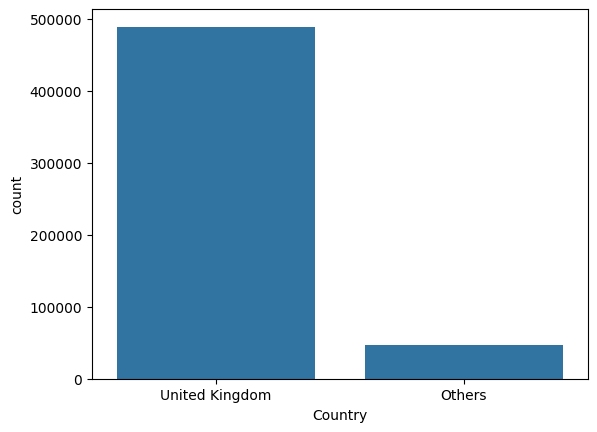

In [22]:
# Визуализация количества записей в категории страны (Country)
sns.countplot(x = 'Country', data = df)

### Количественные данные

#### Столбец 4 'Quantity'

In [23]:
# Посмотрим на описательные статистики количества (Quantity) 
df['Quantity'].describe()

count    535288.000000
mean          9.826705
std         217.855684
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [24]:
# Заметим, что существуют отрицательные значения, которые могут указывать на отмененные/возвращенные заказы
# Оставим только те записи, у которых положительные значения количества (Quantity), что по нашему предположению говорит о совершенных заказах
df = df[df['Quantity'] >= 0]

In [25]:
df['Quantity'].describe()

count    525484.000000
mean         10.689089
std         157.406515
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

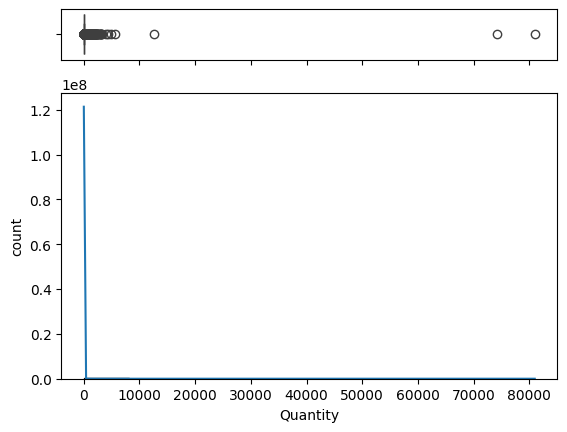

In [26]:
# TEST !!!!!!!

# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df['Quantity'], ax = ax_box)
sns.histplot(data = df, x = 'Quantity', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Quantity')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

1.0 11.0


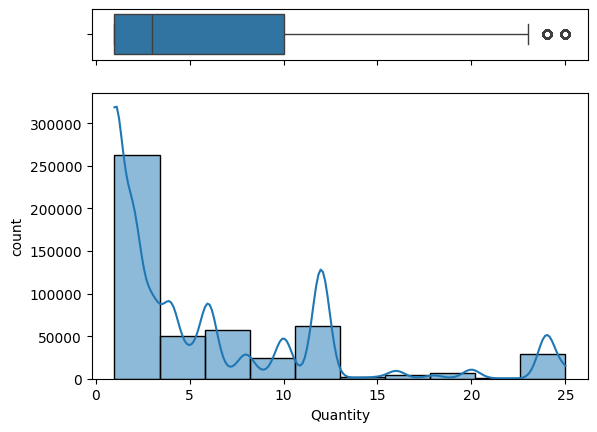

In [27]:
q_low = df['Quantity'].quantile(0.25)
q_hi = df['Quantity'].quantile(0.75)
print(q_low, q_hi)
q_range = q_hi - q_low
df_kv = df[(df['Quantity'] < q_hi + 1.5 * q_range) & (df['Quantity'] > q_low - 1.5 * q_range)]

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df_kv['Quantity'], ax = ax_box)
sns.histplot(data = df_kv, x = 'Quantity', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Quantity')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

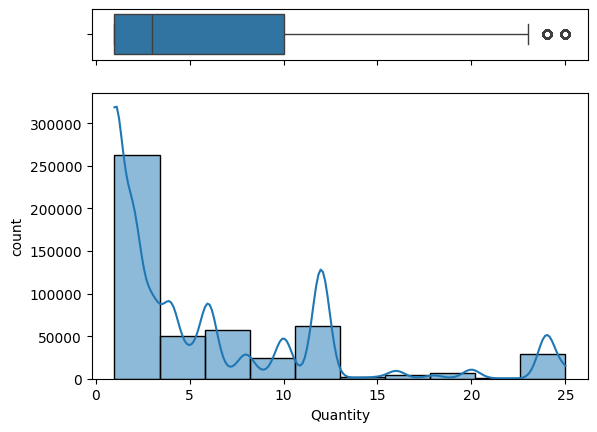

In [28]:
Q1 =  df['Quantity'].quantile(0.25)   # q_low
Q3 = df['Quantity'].quantile(0.75)    # q_high
IQR = Q3 - Q1                         # q_range
df_IQR = df[df['Quantity'] < (Q3 + 1.5 * IQR)]

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df_IQR['Quantity'], ax = ax_box)
sns.histplot(data = df_IQR, x = 'Quantity', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Quantity')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

#### Столбец 5 'UnitPrice'

In [29]:
# Посмотрим описательные статистики значений цены за единицу товара (UnitPrice) и распределение по перцентилям
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    525484.000000
mean          3.732285
std          38.455681
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
85%           5.790000
95%           9.950000
99%          16.950000
max       13541.330000
Name: UnitPrice, dtype: float64

In [30]:
# Удаление записей с нулевой ценой за единицу товара (UnitPrice = 0)
df = df[df['UnitPrice'] != 0.0]

In [31]:
# ????
df = df[df['UnitPrice'] > 0]

In [32]:
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    524467.000000
mean          3.781707
std          31.854666
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
85%           5.790000
95%           9.950000
99%          16.950000
max       13541.330000
Name: UnitPrice, dtype: float64

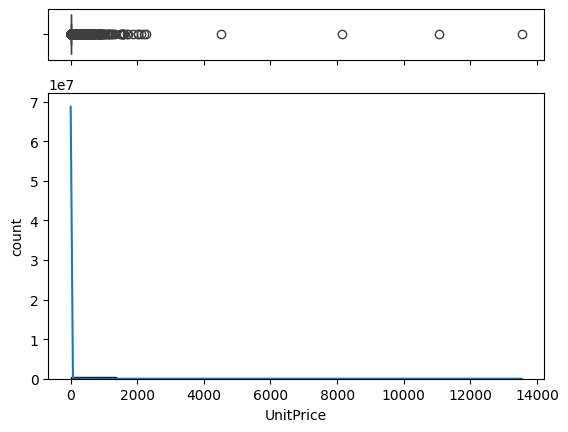

In [33]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df['UnitPrice'], ax = ax_box)
sns.histplot(data = df, x = 'UnitPrice', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'UnitPrice')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

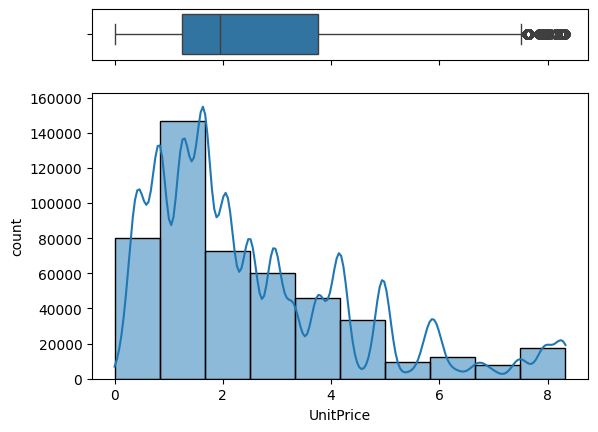

In [34]:
Q11 =  df['UnitPrice'].quantile(0.25)   # q_low
Q33 = df['UnitPrice'].quantile(0.75)    # q_high
IQRy = Q33 - Q11                         # q_range
df_IQRy = df[df['UnitPrice'] < (Q33 + 1.5 * IQRy)]

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df_IQRy['UnitPrice'], ax = ax_box)
sns.histplot(data = df_IQRy, x = 'UnitPrice', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'UnitPrice')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

In [35]:
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    524467.000000
mean          3.781707
std          31.854666
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
85%           5.790000
95%           9.950000
99%          16.950000
max       13541.330000
Name: UnitPrice, dtype: float64

In [36]:
df_IQRy.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    486841.000000
mean          2.536561
std           1.916293
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
85%           4.250000
95%           6.750000
99%           8.290000
max           8.330000
Name: UnitPrice, dtype: float64

#### Столбец 7 'Age'

In [37]:
# Посмотрим на описательные статистики записей о возрасте клиентов (Age) 
df['Age'].describe()

count    524467.000000
mean         34.849531
std          12.984477
min          15.000000
25%          25.000000
50%          31.000000
75%          43.000000
max         100.000000
Name: Age, dtype: float64

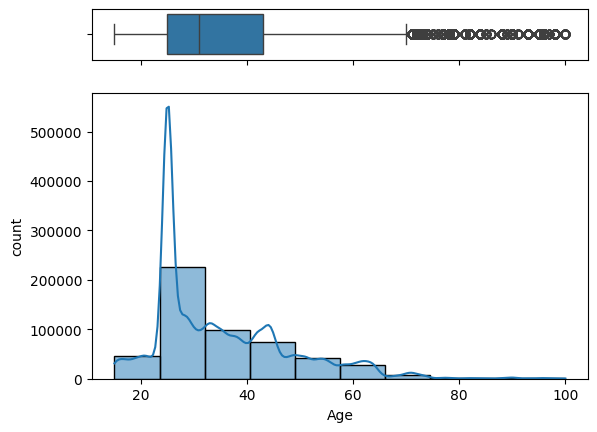

In [38]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df['Age'], ax = ax_box)
sns.histplot(data = df, x = 'Age', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Age')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

In [39]:
# Проверка количества уникальных совпадений по возрастам клиентов (Age) среди всех записей
df.Age.value_counts(normalize = True)

Age
25    0.272021
28    0.032069
44    0.031352
33    0.030086
29    0.028978
        ...   
76    0.000071
85    0.000061
89    0.000059
86    0.000042
97    0.000027
Name: proportion, Length: 80, dtype: float64

In [40]:
# Проверка количества уникальных совпадений по возрастам клиентов (Age) среди всех записей, 
# сгруппированных по 10 отрезкам возрастов (Age) по убыванию
df.Age.value_counts(normalize = True, bins = 10)

(23.5, 32.0]      0.452385
(32.0, 40.5]      0.166605
(40.5, 49.0]      0.152429
(14.914, 23.5]    0.086234
(49.0, 57.5]      0.066839
(57.5, 66.0]      0.055229
(66.0, 74.5]      0.014310
(83.0, 91.5]      0.002288
(74.5, 83.0]      0.002086
(91.5, 100.0]     0.001594
Name: proportion, dtype: float64

In [41]:
# Топ-10 возрастов клиентов (Age)
df.Age.value_counts().head(10)

Age
25    142666
28     16819
44     16443
33     15779
29     15198
42     14066
26     13086
35     12990
27     12245
45     11648
Name: count, dtype: int64

#### Столбец 9 'Income'

In [ ]:
# ???
# Проверка количества уникальных совпадений по доходу клиентов (Income) среди всех записей
df.Income.value_counts(normalize = True)

In [ ]:
# ???
# Проверка количества уникальных совпадений по доходу клиентов (Income) среди всех записей, 
# сгруппированных по 10 отрезкам доходов клиентов (Income) по убыванию
df.Income.value_counts(normalize = True, bins = 10)

In [54]:
# Посмотрим описательные статистики значений цены за единицу товара (Income) и распределение по перцентилям
df.Income.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    375312.000000
mean      33449.983047
std        6464.240539
min       18662.725643
25%       32029.371629
50%       32992.043135
75%       35186.809490
85%       41713.587444
95%       43380.636114
99%       44358.814114
max       45925.206366
Name: Income, dtype: float64

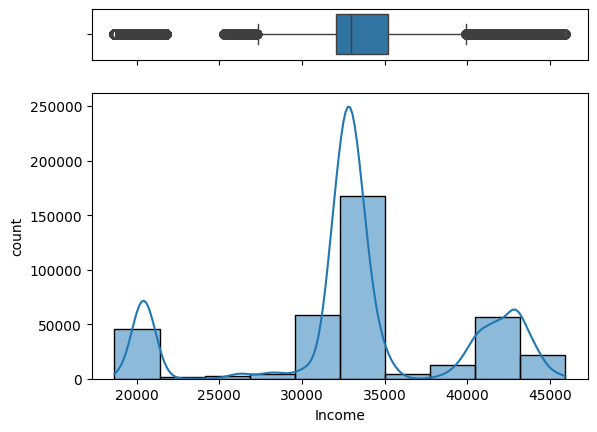

In [55]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df['Income'], ax = ax_box)
sns.histplot(data = df, x = 'Income', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Income')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

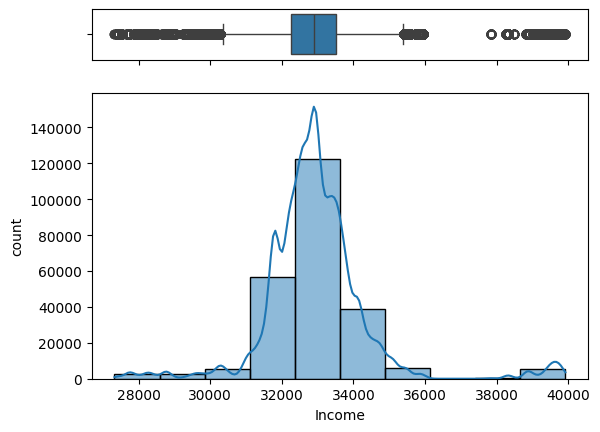

In [56]:
Q1i =  df['Income'].quantile(0.25)   # q_low
Q3i = df['Income'].quantile(0.75)    # q_high
IQRi = Q3i - Q1i                         # q_range
lower = Q1i - 1.5 * IQRi
upper = Q3i + 1.5 * IQRi
df_IQRi = df[(df['Income'] >= lower) & (df['Income'] <= upper)]

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = df_IQRi['Income'], ax = ax_box)
sns.histplot(data = df_IQRi, x = 'Income', ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'Income')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

In [57]:
df.Income.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    375312.000000
mean      33449.983047
std        6464.240539
min       18662.725643
25%       32029.371629
50%       32992.043135
75%       35186.809490
85%       41713.587444
95%       43380.636114
99%       44358.814114
max       45925.206366
Name: Income, dtype: float64

In [58]:
df_IQRi.Income.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    239858.000000
mean      32961.834149
std        1495.772827
min       27326.356715
25%       32251.404580
50%       32903.130864
75%       33513.444454
85%       33861.826168
95%       34848.162619
99%       39579.054674
max       39917.938386
Name: Income, dtype: float64

### Временные ряды

#### Столбец 0 'InvoiceDate'

In [42]:
# Первая покупка в датасете
print('The minimum date is:', df.InvoiceDate.min())

# Последняя покупка в датасете
print('The maximum date is:', df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


Из собранных данных можно заметить, что первая запись в датасете относится к 1 декабря 2010 года в 8:26, а последняя — к 9 декабря 2011 года в 12:50.
Исходя из этого, можем исключить декабрь 2011 года из анализа, поскольку нет полной информации об этом месяце.

In [43]:
# Удаление записи из датафрейма за декабрь 2011 года
df = df[df.InvoiceDate < '2011-12-01']

### Остальные данные

#### Столбец 1 'InvoiceNo'

In [44]:
# Номера операций/заказов (InvoiceNo), начинающиеся с символа 'C', который указывает на возвращенные или отмененные заказы
df[df['InvoiceNo'].str.startswith('C') == True]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country


In [45]:
# Удаление всех номеров операций (InvoiceNo), начинающихся с символа 'C'
df = df[df['InvoiceNo'].str.startswith('C') != True]

In [46]:
# Проверка количества уникальных номеров операций (InvoiceNo)
df.InvoiceNo.nunique()

19036

#### Столбец 2 'StockCode'

In [47]:
# Проверка количества уникальных биржевых кодов-идентификаторов (StockCode) среди всех записей о продажах
df.StockCode.nunique()

3914

In [48]:
# Топ-10 биржевых кодов-идентификаторов (StockCode), которые продавались чаще всего
df.StockCode.value_counts().head(10)

StockCode
85123A    2186
85099B    2055
22423     1946
47566     1671
20725     1538
84879     1429
22197     1350
22720     1350
21212     1315
22383     1273
Name: count, dtype: int64

#### Столбец 6 'CustomerID'

In [49]:
# Проверка количество уникальных идентификаторов клиентов (CustomerID)
df.CustomerID.nunique()

4293

In [50]:
# Проверка записей, в которых идентификатор клиента (CustomerID) имеет пустые значения
df[df.CustomerID.isnull()]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
1443,2010-12-01 14:32:00,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,25,female,32130.475292,United Kingdom
1444,2010-12-01 14:32:00,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,25,female,32130.475292,United Kingdom
1445,2010-12-01 14:32:00,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,25,female,32130.475292,United Kingdom
1446,2010-12-01 14:32:00,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,25,female,32130.475292,United Kingdom
1447,2010-12-01 14:32:00,536544,21790,VINTAGE SNAP CARDS,9,1.66,NaN,25,female,32130.475292,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
515863,2011-11-30 15:33:00,579787,21888,BINGO SET,2,7.46,NaN,25,female,32130.475292,United Kingdom
515864,2011-11-30 15:33:00,579787,21912,VINTAGE SNAKES & LADDERS,1,7.46,NaN,25,female,32130.475292,United Kingdom
515865,2011-11-30 15:33:00,579787,21916,SET 12 RETRO WHITE CHALK STICKS,1,0.79,NaN,25,female,32130.475292,United Kingdom
515866,2011-11-30 15:33:00,579787,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,4.13,NaN,25,female,32130.475292,United Kingdom


In [51]:
# Удаление записей, в которых идентификатор клиента (CustomerID) имеет пустые значения
df = df[~df.CustomerID.isnull()]

## 2 этап -- нахождение различий


### Категориальные данные

In [ ]:
sns.countplot(x = 'Country', hue = 'Gender', data = df)

In [ ]:
# добавим еще один признак (пол) через параметр col
sns.countplot(x = 'Country', hue = 'Gender', data = df);
sns.catplot(x = 'Country', hue = 'Gender',
            col = 'Description', kind = 'count', data = df);

### Количественные данные

## 3 этап -- выявление взаимосвязи


# Когортный анализ


# RFM-анализ
